# Problem Formulation

This section supports topics covered in the class for problem formulation. Following block of code imports required packages.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

## Example 1

Consider the following optimization problem:

$$
\begin{aligned}
    \min_{x_1,x_2} \quad & f(x_1,x_2) =  x_1^2 - 2x_2^2 - 4x_1 \\
    \textrm{subject to} \quad & x_1 + x_2 \leq 6 \\
    \textrm{bounded by} \quad & x_1 \geq 0 \\
    \quad & 0 \leq x_2 \leq 3
\end{aligned}
$$

**Question 1**: Transcribe the problem into the standard design optimization problem.

**Answer**:

$$
% \text{min } f(x_1,x_2) = x_1^2 - 2x_2^2 - 4x_1\\
% \text{subject to }
% \begin{aligned}
% g_1(x_1,x_2) = x_1 + x_2 - 6 \leq 0 \\
% g_2(x_1,x_2) = x_2 - 3 \leq 0 \\
% g_3(x_1,x_2) = -x_1 \leq 0 \\
% g_4(x_1,x_2) = -x_2 \leq 0
% \end{aligned}
\begin{aligned}
    \min_{x_1,x_2} \quad & f(x_1,x_2) =  x_1^2 - 2x_2^2 - 4x_1 \\
    \textrm{subject to} \quad & g_1(x_1,x_2) = x_1 + x_2 - 6 \leq 0 \\
    \textrm{bounded by} \quad & x_1 \geq 0 \\
    \quad & x_2 \geq 0 \\
    \quad & x_2 \leq 3
\end{aligned}
$$

There is one constraint and three bounds on the design variables.

**Question 2**: Plot the objective contours and constraints.

**Answer**: Following block of code defines a python function which returns function, constraint, and bound values at given $x_1$ and $x_2$.

In [11]:
def function_1(x1, x2):
    """
        Function to calculate the value of function, constraints and bounds
        at given x values.
    """
    
    f = x1**2 - 2*x2**2 - 4*x1
    g1 = x1 + x2 - 6
    b1 = x1
    b2 = x2
    b3 = x2 - 3

    return f, g1, b1, b2, b3

Following block of code uses the above defined function for plotting.

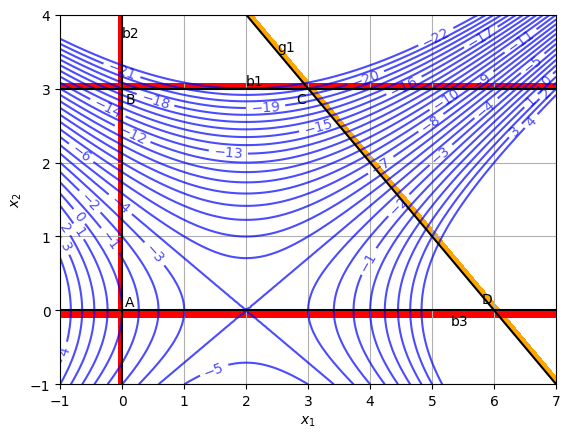

In [13]:
# Defining x1 and x2 values
x1 = np.linspace(-1,7,100)
x2 = np.linspace(-1,4,100)

# Creating a mesh at which values and 
# gradient will be evaluated and plotted
X1, X2 = np.meshgrid(x1, x2)

# Evaluating the value and gradient
Z, g1, b1, b2, b3 = function_1(X1,X2)

# Plotting the graph
fig, ax = plt.subplots()

# Function contour
CS = ax.contour(X1, X2, Z, levels=np.arange(-22, 5, 1), colors='b', alpha=0.7)
ax.clabel(CS, inline=1, fontsize=10)

# Constraint 1
ax.contour(X1, X2, g1, levels=[0], colors='k')
ax.contourf(X1, X2, g1, levels=[0.01, 0.1], colors='orange')
ax.annotate('g1', xy=(2.5, 3.5))

# Constraint 2
ax.contour(X1, X2, b1, levels=[0], colors='k')
ax.contourf(X1, X2, b1, levels=[-0.07, -0.01], colors='red')
ax.annotate('b1', xy =(2, 3.05))

# Cosntraint 3
ax.contour(X1, X2, b2, levels=[0], colors='k')
ax.contourf(X1, X2, b2, levels=[-0.1, -0.001], colors='red')
ax.annotate('b2', xy =(0.0, 3.7))

# Cosntraint 4
ax.contour(X1, X2, b3, levels=[0], colors='k')
ax.contourf(X1, X2, b3, levels=[0.001, 0.07], colors='red')
ax.annotate('b3', xy =(5.3, -0.2))

# Few annotations
ax.annotate('A', xy =(0.05, 0.05))
ax.annotate('B', xy =(0.05, 2.8))
ax.annotate('C', xy =(2.8, 2.8))
ax.annotate('D', xy =(5.8, 0.1))

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.grid()

plt.show()

**Legend** for the above plot:

*Blue lines*: Contour lines for function values.</br>
*Black lines*: Line where constraint/bound is active.</br>
*Orange/Red thick lines*: Shows infeasible side of the constraint/bound.

**Question 3**: Identify the feasible region, optimum solution, and the active constraint/bound(s).

**Answer**: Quadrilateral ABCDA is the feasible region. Optimum solution: $x_1^* = 2$, $x_2^* = 3$, $f(2,3) = -22$, Active constraint/bound: $b_1$. This shows that it is not necessary to have an optimum point in a corner.

## Example 2

**Question 1**: Plot the following objective function, constraints, and bounds in the x – y plane:

$$
    \begin{aligned}
        \min_{x,y} \quad & f(x,y) = 2x + 3y - x^3 - 2y^2 \\
        \textrm{subject to} \quad & g_1(x,y) = x + 3y - 6 \leq 0 \\
        \quad & g_2(x,y) = 5x + 2y - 10 \leq 0 \\
        \textrm{bounded by} \quad & x \geq 0 \\
        \quad & y \geq 0 \\
    \end{aligned}
$$

There are two constraints and two bounds on the design variables.

**Answer**: Following block of code defines a python function which returns function, constraint, and bound values at given x and y.

In [6]:
def function_2(x, y):
    """
        Function to calculate the value of function at given x values.
    """
    
    f = 2*x + 3*y - x**3 - 2*y**2
    g1 = x + 3*y - 6
    g2 = 5*x + 2*y - 10
    b1 = x
    b2 = y
    
    return f, g1, g2, b1, b2

Following block of code uses above defined function for plotting.

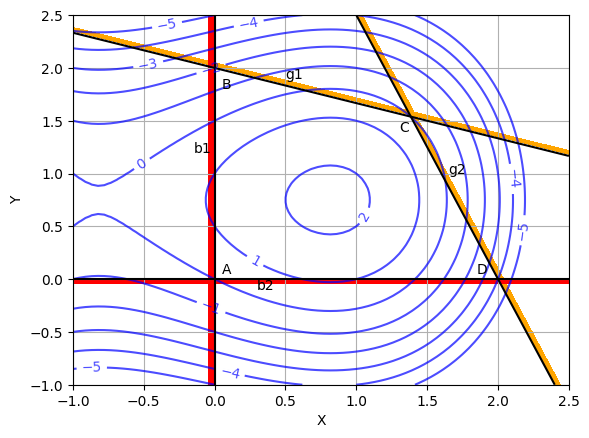

In [9]:
# Defining x and y values
x = np.linspace(-1,2.5,80)
y = np.linspace(-1,2.5,80)

# Creating a mesh at which values and 
# gradient will be evaluated and plotted
X, Y = np.meshgrid(x, y)

# Evaluating the value and gradient
Z, g1, g2, b1, b2 = function_2(X,Y)

# Plotting the graph
fig, ax = plt.subplots()

# Function contour
CS = ax.contour(X, Y, Z, levels=np.arange(-5, 5, 1), colors='b', alpha=0.7)
ax.clabel(CS, inline=1, fontsize=10)

# Constraint 1
ax.contour(X, Y, g1, levels=[0], colors='k')
ax.contourf(X, Y, g1, levels=[0.05, 0.15], colors='orange')
ax.annotate('g1', xy =(0.5, 1.9))

# Constraint 2
ax.contour(X, Y, g2, levels=[0], colors='k')
ax.contourf(X, Y, g2, levels=[0.05, 0.2], colors='orange')
ax.annotate('g2', xy =(1.65,1.0))

# Cosntraint 3
ax.contour(X, Y, b1, levels=[0], colors='k')
ax.contourf(X, Y, b1, levels=[-0.05, -0.001], colors='red')
ax.annotate('b1', xy =(-0.15, 1.2))

# Cosntraint 4
ax.contour(X, Y, b2, levels=[0], colors='k')
ax.contourf(X, Y, b2, levels=[-0.05, -0.001], colors='red')
ax.annotate('b2', xy =(0.3, -0.1))

# Few annotations
ax.annotate('A', xy =(0.05, 0.05))
ax.annotate('B', xy =(0.05, 1.8))
ax.annotate('C', xy =(1.3, 1.4))
ax.annotate('D', xy =(1.85, 0.05))

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid()

plt.show()

**Legend** for the above plot:

*Blue lines*: Contour lines for function values.</br>
*Black lines*: Line where constraint/bound is active.</br>
*Orange/Red thick lines*: Shows infeasible side of constraint/bound.

**Question 2**: Identify the feasible region. By visual inspection, determine minimum and maximum points for objective function. For each of those points, give objective function value, active constraints/bounds (if any).

**Answer**: Quadrilateral ABCDA is the feasible region. Since function value increases as you move inwards from boundary of feasible region, four corners will be minimum.

Local minimum: $A(0,0)$ with $f(0,0) = 0$. Active constraints/bounds: $b_1$ and $b_2$</br>
Local minimum: $B(0,2)$ with $f(0,2) = -2$. Active constraints/bounds: $g_1$ and $b_1$</br>
Local minimum: $C(1.39,1.54)$ with $f(1.39,1.54) = 0$. Active constraints/bounds: $g_1$ and $g_2$</br>
Local minimum: $D(2,0)$ with $f(2,0) = -4$. Active constraints/bounds: $g_2$ and $b_2$

**Global minimum**: $D(2,0)$ with $f(2,0) = -4$. Active constraints/bounds: $g_2$ and $g_4$

**Global maximum**: $E(0.82,0.75)$ with $f(0.82,0.75) = 2.21$. Active constraints/bounds: None